In [77]:
import numpy as np
import random
import pygame as pg

random.randrange(10,50)

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


45

In [21]:
from scipy.spatial import distance
import enum 
import copy 

class Object:
    def __init__(self, position):
        self.position = position
        
class State(enum.Enum):
    FIND_FOOD = 0
    GO_BACK = 1

class Organism(Object):
    PREDATOR_PREY_RATIO = 1.6
    SENSE_FACTOR = 2
    color = (255, 255, 255)
    food_found = 0
    state = State.FIND_FOOD
    energy = 0
    
    def __init__(self, size, speed, sense, max_w, max_h):
        # Organism starts at a border
        if random.random() > 0.5:
            x = random.uniform(0, max_w-1)
            y = 0
            if random.random() > 0.5:
                y = max_h-1
        else:
            y = random.uniform(0, max_h-1)
            x = 0
            if random.random() > 0.5:
                x = max_w-1
        super().__init__(np.array([x, y]))
        
        self.size = size
        self.speed = speed
        self.sense = sense
        
        self.max_w = max_w-1
        self.max_h = max_h-1
        
        a2 = random.random() 
        b2 = 1-a2
        a = np.sqrt(a2) * (2*(0.5>random.random())-1)
        b = np.sqrt(b2) * (2*(0.5>random.random())-1)
        
        self.direction = np.array([1, 0])     
        
        
    def energy_cost(self):
        return ((self.size**3)*self.speed**2)+self.sense
    
    def get_coordinates(self):
        return self.position
    
    def reproduce(self, energy):
        offspring = copy.deepcopy(self)
        mutation_chance = 0.1
        
        offspring.size  += (mutation_chance>random.random())*0.1*random.choice([-1,1])#self.size *random.randrange(10,50)*0.01 * (2*(0.5>random.random())-1)
        offspring.speed += (mutation_chance>random.random())*0.1*random.choice([-1,1])#*self.speed*random.randrange(10,50)*0.01 * (2*(0.5>random.random())-1)
        offspring.sense += (mutation_chance>random.random())*0.1*random.choice([-1,1])#*self.sense*random.randrange(10,50)*0.01 * (2*(0.5>random.random())-1)
        offspring.energy = energy      
        offspring.state = State.FIND_FOOD
        
        return offspring
    
    def attributes(self):
        return np.array([self.size, self.speed, self.sense])
    
    def closest_border(self):
        borders = [[self.position[0], 0], [self.max_w, self.position[1]], [self.position[0], self.max_h],[0, self.position[1]]]
        distances = distance.cdist([self.get_coordinates()], borders, 'euclidean')[0]
        closest_idx = np.argmin(distances)
        
        return distances[closest_idx], borders[closest_idx][0], borders[closest_idx][1]
    
    def can_eat(self, other):
        return self.size>= self.PREDATOR_PREY_RATIO*other.size
    
    def walk(self, env, indexKD):
        distances = []
        step_size = self.speed
        direction = self.direction
        
        food = []
        close_predators = []
        close_obj_idx = indexKD.ball(self.position, self.sense * self.SENSE_FACTOR)
        
        for obj in np.array(env)[close_obj_idx]:
            if obj == self: continue
            if not isinstance(obj, Organism): food.append(obj.position)
            elif self.can_eat(obj):
                food.append(obj.position)
            elif obj.can_eat(self):
                close_predators.append(obj.position)
                                
        if len(food) > 0:
            distances = distance.cdist([self.position], food, 'euclidean')[0]
            closest_idx = np.argmin(distances)
            
        if len(close_predators) > 0:
            pr_distances = distance.cdist([self.position], close_predators, 'euclidean')[0]
            pr_idx = np.argmin(pr_distances)
            
            d = (close_predators[pr_idx] + self.position)*-1
            norm = np.linalg.norm(d)
            if norm == 0:
                return
            direction = d/norm 
            #print("RUN!")
        
        elif self.state == State.GO_BACK:
            dist, x, y = self.closest_border()
            step_size = dist if abs(dist) < step_size else step_size
            
            d = np.array([x, y]) - self.position
            norm = np.linalg.norm(d)
            if norm == 0:
                return
            direction = d/norm   
        elif (len(distances) > 0) and (distances[closest_idx] <= (self.sense * self.SENSE_FACTOR)):
            step_size = distances[closest_idx] if abs(distances[closest_idx]) < step_size else step_size
            
            d = food[closest_idx] - self.position
            norm = np.linalg.norm(d)
            if norm == 0:
                return
            direction = d/norm           
        else:            
            #x2=cosβx1−sinβy1, y2=sinβx1+cosβy1
            
            r = random.uniform(-.5, .5)#(-np.pi/2, np.pi/2)
            direction = np.array([np.cos(r)*direction[0] - np.sin(r)*direction[1], 
                                  np.sin(r)*direction[0] + np.cos(r)*direction[1]])
            self.direction = direction/np.linalg.norm(direction)
        
        if self.energy >= self.energy_cost():
            self.position += step_size*direction
        
        self.energy -= self.energy_cost()   
    

Day 0 is over.
Day 1 is over.
Day 2 is over.
Day 3 is over.
Day 4 is over.
Day 5 is over.
Day 6 is over.
Day 7 is over.
Day 8 is over.
Day 9 is over.
Day 10 is over.


c:\users\hayoo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:181: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
c:\users\hayoo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:193: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Day 11 is over.
Day 12 is over.
Day 13 is over.
Day 14 is over.
Day 15 is over.
Day 16 is over.
Day 17 is over.
Day 18 is over.
Day 19 is over.
Day 20 is over.
Day 21 is over.
Day 22 is over.
Day 23 is over.
Day 24 is over.
Day 25 is over.
Day 26 is over.
Day 27 is over.
Day 28 is over.
Day 29 is over.
Day 30 is over.
Day 31 is over.
Day 32 is over.
Day 33 is over.
Day 34 is over.
Day 35 is over.
Day 36 is over.
Day 37 is over.
Day 38 is over.
Day 39 is over.
Day 40 is over.
Day 41 is over.
Day 42 is over.
Day 43 is over.
Day 44 is over.
Day 45 is over.
Day 46 is over.
Day 47 is over.
Day 48 is over.
Day 49 is over.
Day 50 is over.
Day 51 is over.
Day 52 is over.
Day 53 is over.
Day 54 is over.
Day 55 is over.
Day 56 is over.
Day 57 is over.
Day 58 is over.
Day 59 is over.
Day 60 is over.


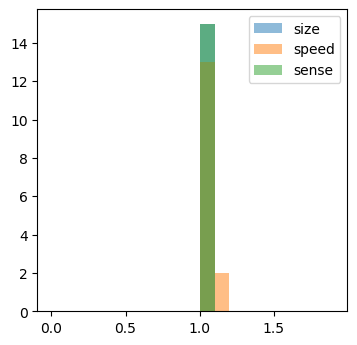

<Figure size 432x288 with 0 Axes>

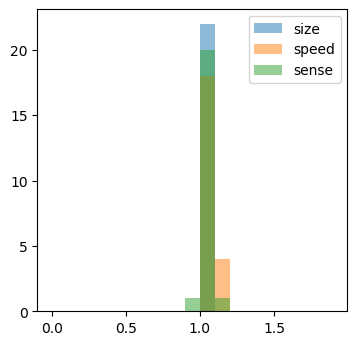

<Figure size 432x288 with 0 Axes>

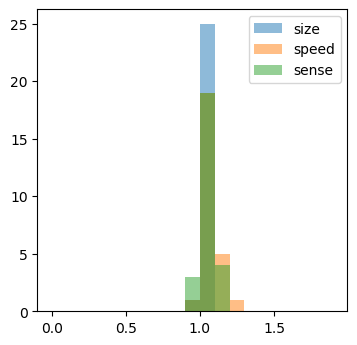

<Figure size 432x288 with 0 Axes>

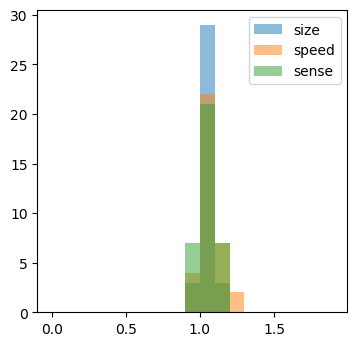

<Figure size 432x288 with 0 Axes>

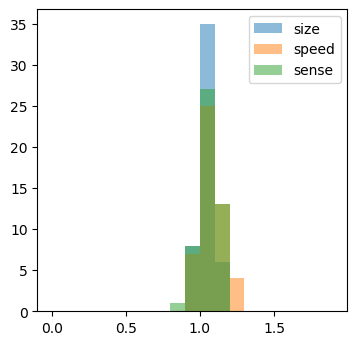

<Figure size 432x288 with 0 Axes>

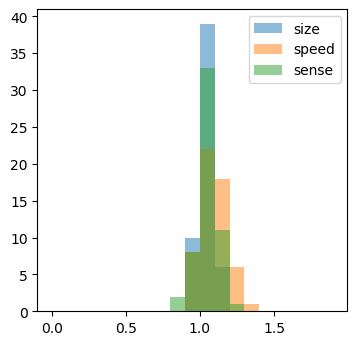

<Figure size 432x288 with 0 Axes>

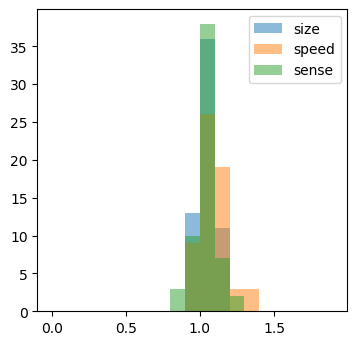

<Figure size 432x288 with 0 Axes>

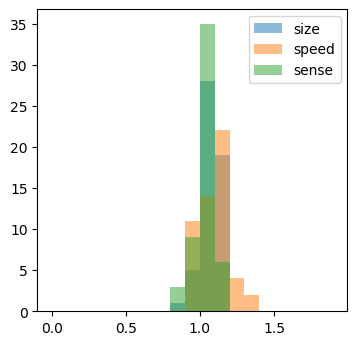

<Figure size 432x288 with 0 Axes>

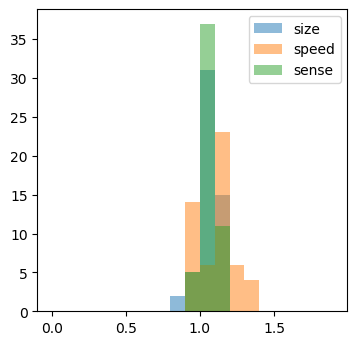

<Figure size 432x288 with 0 Axes>

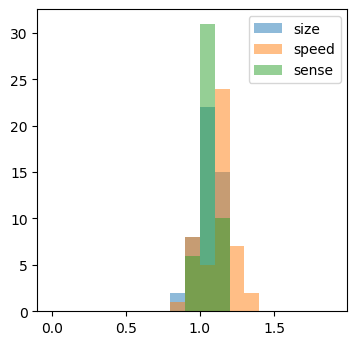

<Figure size 432x288 with 0 Axes>

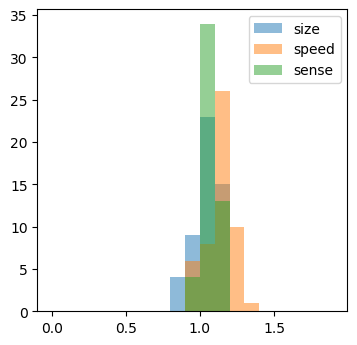

<Figure size 432x288 with 0 Axes>

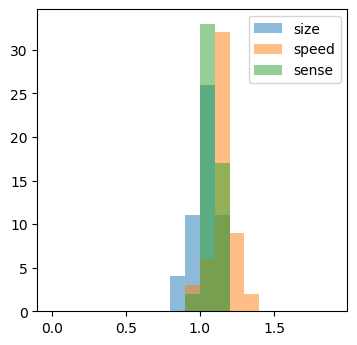

<Figure size 432x288 with 0 Axes>

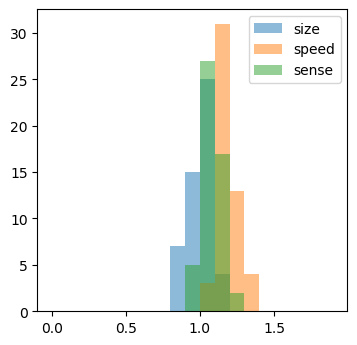

<Figure size 432x288 with 0 Axes>

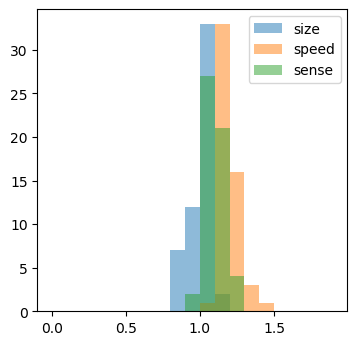

<Figure size 432x288 with 0 Axes>

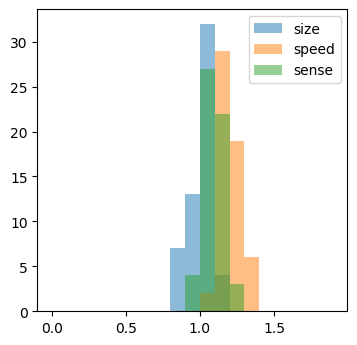

<Figure size 432x288 with 0 Axes>

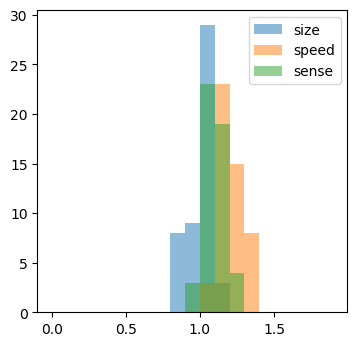

<Figure size 432x288 with 0 Axes>

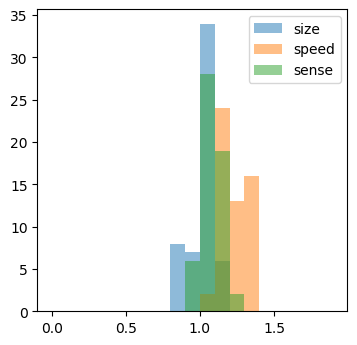

<Figure size 432x288 with 0 Axes>

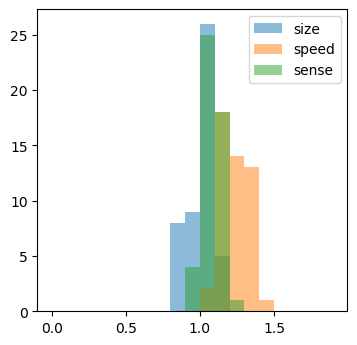

<Figure size 432x288 with 0 Axes>

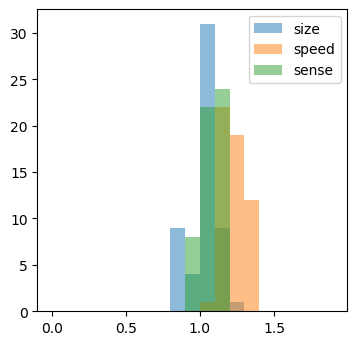

<Figure size 432x288 with 0 Axes>

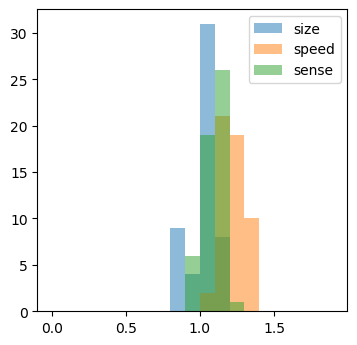

<Figure size 432x288 with 0 Axes>

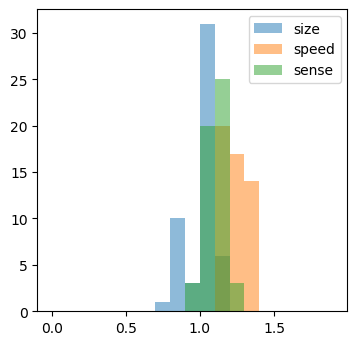

<Figure size 432x288 with 0 Axes>

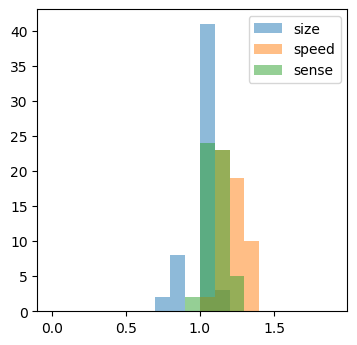

<Figure size 432x288 with 0 Axes>

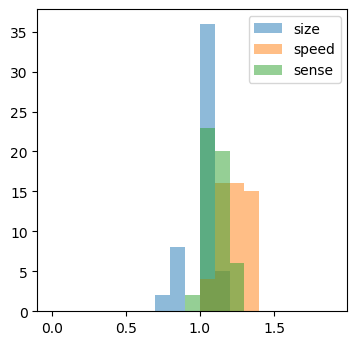

<Figure size 432x288 with 0 Axes>

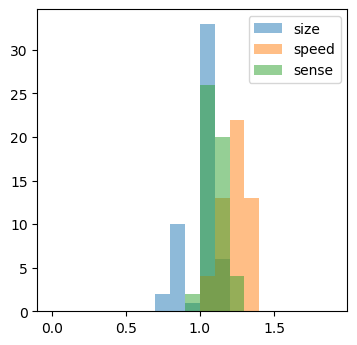

<Figure size 432x288 with 0 Axes>

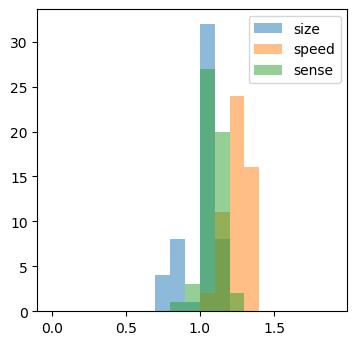

<Figure size 432x288 with 0 Axes>

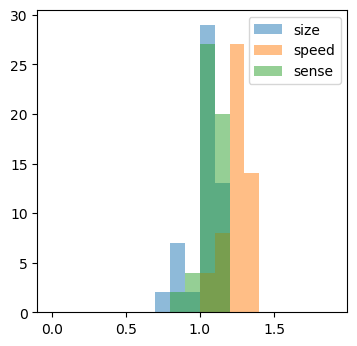

<Figure size 432x288 with 0 Axes>

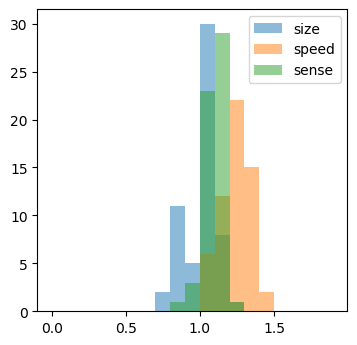

<Figure size 432x288 with 0 Axes>

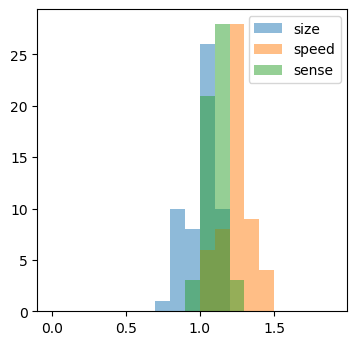

<Figure size 432x288 with 0 Axes>

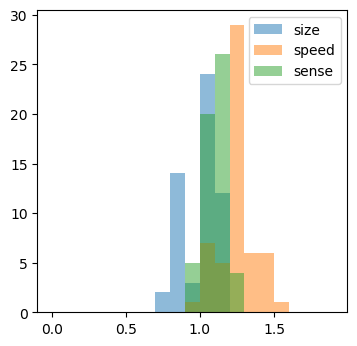

<Figure size 432x288 with 0 Axes>

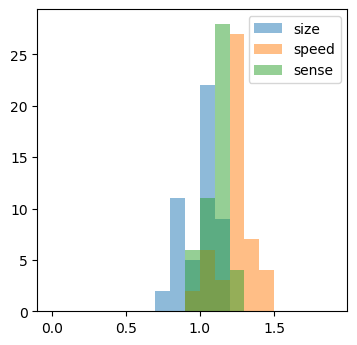

<Figure size 432x288 with 0 Axes>

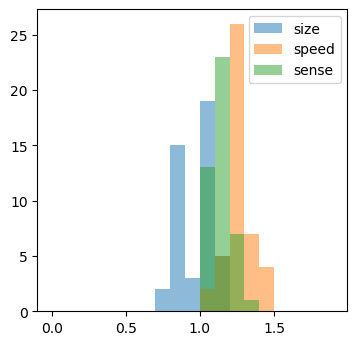

<Figure size 432x288 with 0 Axes>

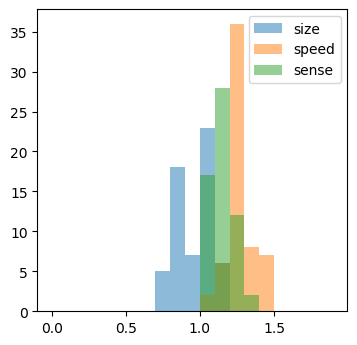

<Figure size 432x288 with 0 Axes>

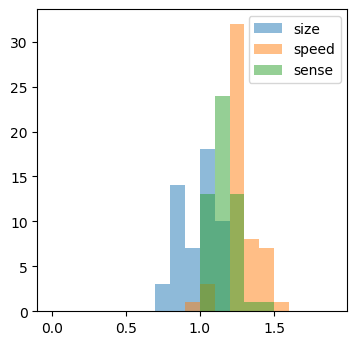

<Figure size 432x288 with 0 Axes>

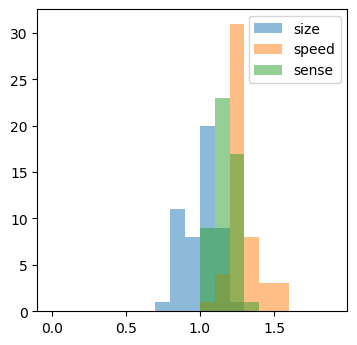

<Figure size 432x288 with 0 Axes>

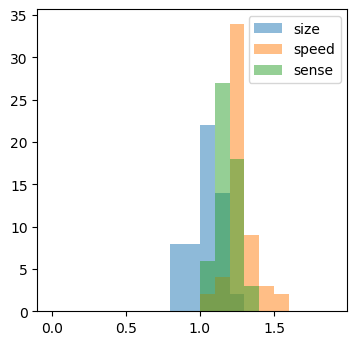

<Figure size 432x288 with 0 Axes>

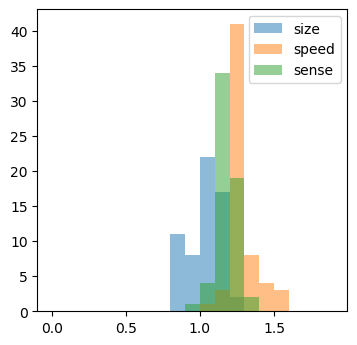

<Figure size 432x288 with 0 Axes>

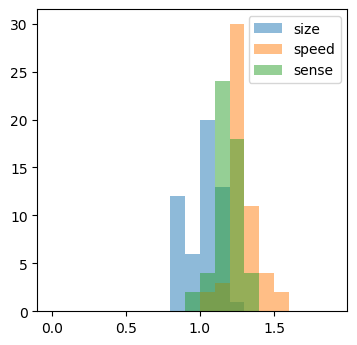

<Figure size 432x288 with 0 Axes>

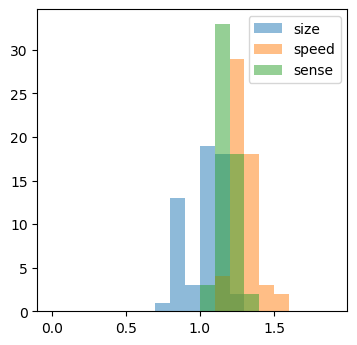

<Figure size 432x288 with 0 Axes>

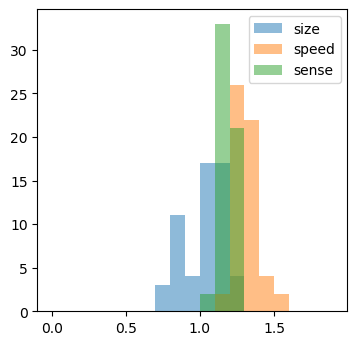

<Figure size 432x288 with 0 Axes>

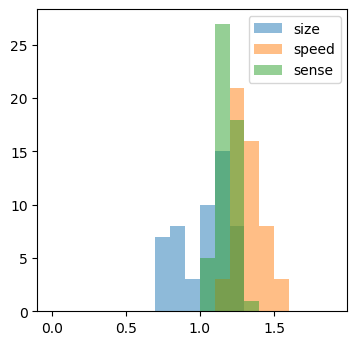

<Figure size 432x288 with 0 Axes>

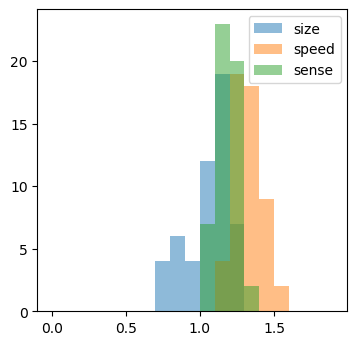

<Figure size 432x288 with 0 Axes>

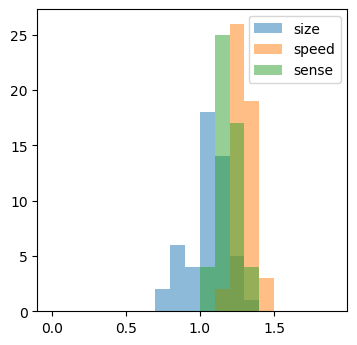

<Figure size 432x288 with 0 Axes>

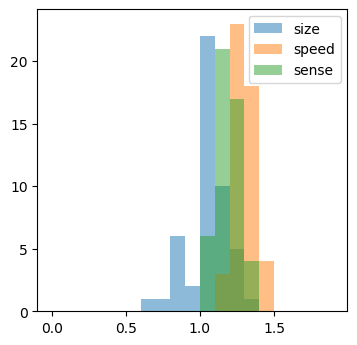

<Figure size 432x288 with 0 Axes>

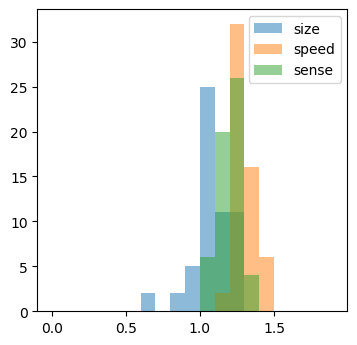

<Figure size 432x288 with 0 Axes>

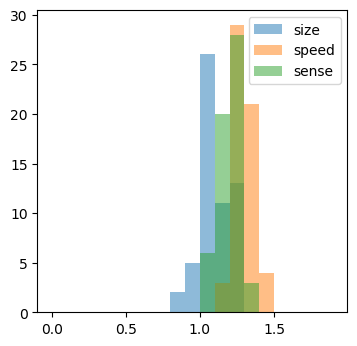

<Figure size 432x288 with 0 Axes>

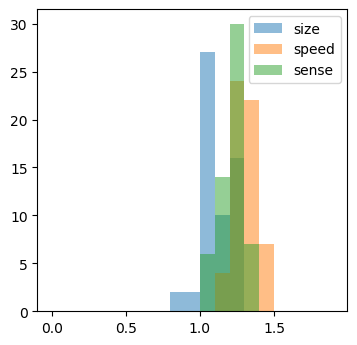

<Figure size 432x288 with 0 Axes>

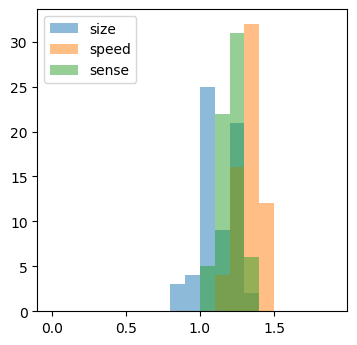

<Figure size 432x288 with 0 Axes>

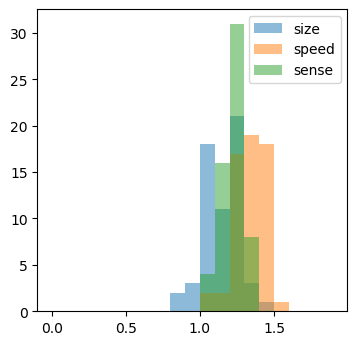

<Figure size 432x288 with 0 Axes>

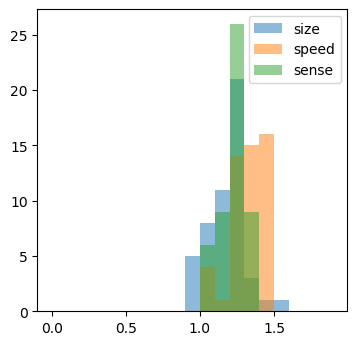

<Figure size 432x288 with 0 Axes>

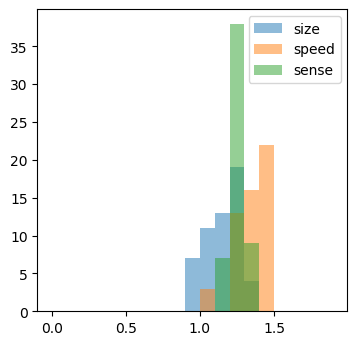

<Figure size 432x288 with 0 Axes>

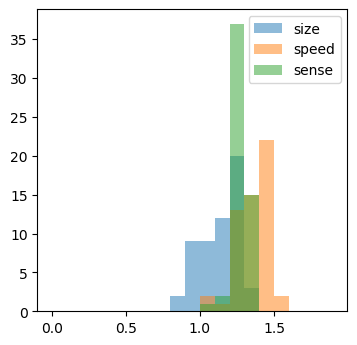

<Figure size 432x288 with 0 Axes>

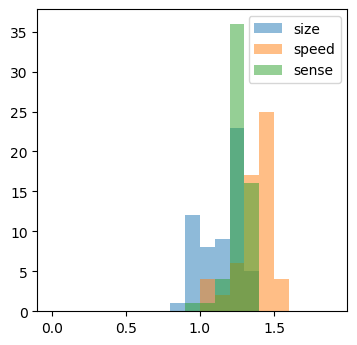

<Figure size 432x288 with 0 Axes>

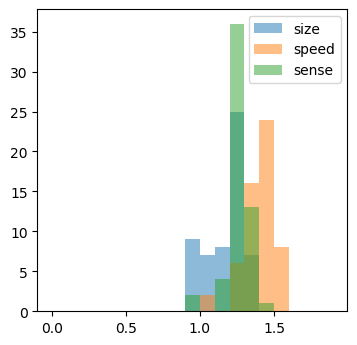

<Figure size 432x288 with 0 Axes>

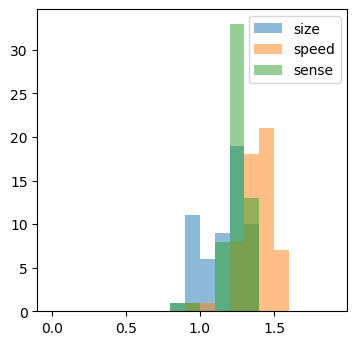

<Figure size 432x288 with 0 Axes>

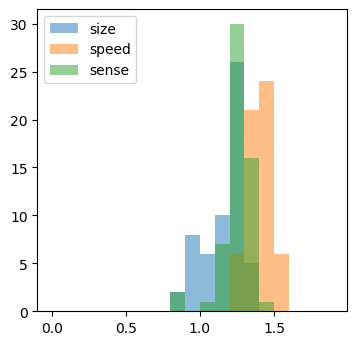

<Figure size 432x288 with 0 Axes>

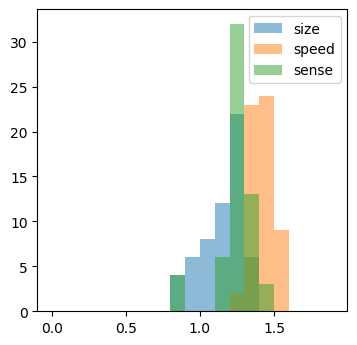

<Figure size 432x288 with 0 Axes>

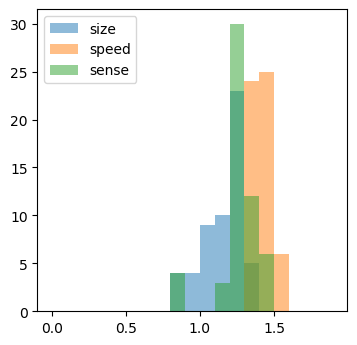

<Figure size 432x288 with 0 Axes>

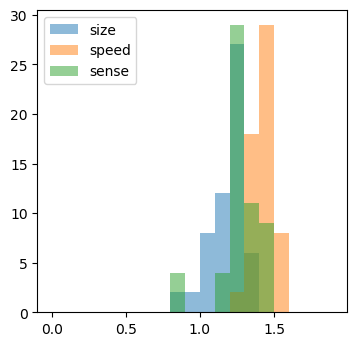

<Figure size 432x288 with 0 Axes>

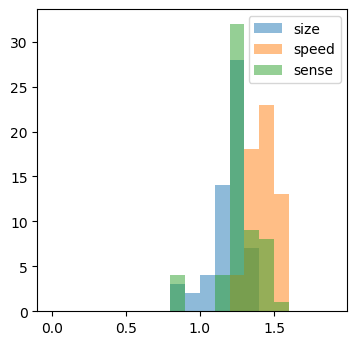

<Figure size 432x288 with 0 Axes>

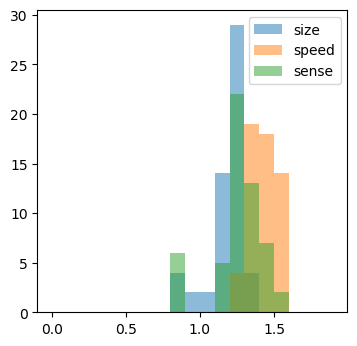

<Figure size 432x288 with 0 Axes>

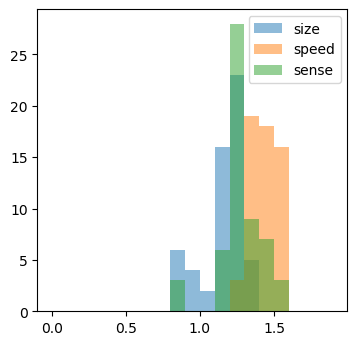

<Figure size 432x288 with 0 Axes>

In [29]:
import numpy as np
import random
import pygame as pg
from pygame.locals import *
from pyoints import indexkd # Needs Rtree from https://www.lfd.uci.edu/~gohlke/pythonlibs/#rtree and GDAL from https://www.lfd.uci.edu/~gohlke/pythonlibs/#gdal
import matplotlib
matplotlib.use("Agg")

import matplotlib.backends.backend_agg as agg
import pylab

SCREEN_WIDTH, SCREEN_HEIGHT = 800,600
ENV_WIDTH, ENV_HEIGHT = 100, 80

BACK_COLOR = (100, 100, 100)
BLOCK_COLOR = (200, 200, 200)
MAZE_COLOR = (255, 255, 255)
UNVISITED_COLOR = (200, 200, 200)


BLOCK_SIZE = 5  # Pixel size/Wall thickness

ENV_WIDTH_PX = BLOCK_SIZE * ENV_WIDTH 
ENV_HEIGHT_PX = BLOCK_SIZE * ENV_HEIGHT 
ENV_TOP_LEFT_CORNER = (SCREEN_WIDTH // 2 - ENV_WIDTH_PX // 2, SCREEN_HEIGHT // 2 - ENV_HEIGHT_PX // 2)

MINUTES_PER_DAY = 100
DAY_ENERGY = 25*MINUTES_PER_DAY
REMOVE_EXCESS_FOOD = True

screen = None

def init_organisms(n, attr):
    organisms = []
    for _ in range(n):
        o = Organism(attr[0], attr[1], attr[2], ENV_WIDTH, ENV_HEIGHT)
        o.energy = DAY_ENERGY
        organisms.append(o)
    return organisms


def draw(color, x, y, factor = 1):
    pg.draw.rect(screen, color, (x, y, factor*BLOCK_SIZE, factor*BLOCK_SIZE))

def draw_environment(screen, env):
        screen.fill(BACK_COLOR)
        pg.draw.rect(screen, (0,0,0), (ENV_TOP_LEFT_CORNER[0], ENV_TOP_LEFT_CORNER[1],
                                               ENV_WIDTH_PX, ENV_HEIGHT_PX))
        draw_xy, color = np.array([0,0]), None
        for o in env:
            color = (0,255,0) if not isinstance(o, Organism) else o.color 
            draw_xy = o.position*BLOCK_SIZE + ENV_TOP_LEFT_CORNER
            factor = 1 if not isinstance(o, Organism) else o.size
            draw(color, draw_xy[0], draw_xy[1], factor)

def kill(env):
    kill_counter = 0
    
    for o in env.copy():
        if not isinstance(o, Organism): continue
        dist_to_border, _, _ = o.closest_border()
        if (o.energy <= 0) or (dist_to_border > 1):
            env.remove(o)
            kill_counter += 1
    #print("{} organisms killed".format(kill_counter))
            
            
def sleep_and_reproduce(env):
    babies = []
    for o in env:
        if not isinstance(o, Organism): continue
        if o.food_found >= 2:
            babies.append(o.reproduce(DAY_ENERGY))
        o.food_found = 0
        o.energy = DAY_ENERGY
        o.state = State.FIND_FOOD
    env.extend(babies)
    #print("{} babies born".format(len(babies)))
                
def do_one_step(env, m):    
    minutes_left = MINUTES_PER_DAY - m
    
    attributes = np.array([o.attributes() for o in env if isinstance(o, Organism)])
    max_attr = np.max(attributes)
    
    env_copy = env.copy()
    
    coords = np.array([o.position for o in env])
    indexKD = indexkd.IndexKD(coords)
    
    for o in env:
        if not isinstance(o, Organism): continue
        o.walk(env, indexKD)
    
    coords = np.array([o.position for o in env])
    indexKD = indexkd.IndexKD(coords)
    for o in env_copy:
        if not isinstance(o, Organism): continue    
        close_obj_idx = indexKD.ball(o.position, o.sense*o.SENSE_FACTOR)
        #print(close_obj_idx)
        #if len(close_obj_idx) == 0: continue
        for obj in np.array(env_copy)[close_obj_idx]:
            if obj == o: continue
            if not np.linalg.norm(obj.position-o.position) <= 0.01: continue
            if not isinstance(obj, Organism) or o.can_eat(obj):
                if obj in env:
                    env.remove(obj)
                    o.food_found += 1
                    dist_to_border, _, _ = o.closest_border()
                    if (o.food_found > 1) or (dist_to_border/o.speed >= minutes_left-5):
                        o.state = State.GO_BACK
                    break
            
        pos = o.get_coordinates()%np.array([ENV_WIDTH-1, ENV_HEIGHT-1])
        #min(max(x,0),ENV_WIDTH-1)
        #min(max(y,0), ENV_HEIGHT-1)
        o.position = pos
        o.color = o.attributes()*255/max_attr
                
def run_simulation(num_days=None, display=True):
    if not display and not num_days:
        num_days = 100
    if display:
        global screen
        pg.init()
        screen = pg.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
        pg.display.update()
    
    raw_data = canvas = None
    env = []
    n_food = 50
    for f in range(n_food):
        x, y = random.randrange(1,ENV_WIDTH-1), random.randrange(1,ENV_HEIGHT-1)
        env.append(Object(np.array([x, y])))
        
    organisms = init_organisms(100, (1, 1, 1))
    env.extend(organisms)
    # Main game loop
    run = True
    
    time_keeper = {"day":0, "minute":0}
    stats = {"population":[len(organisms)], "attributes":[[o.attributes() for o in organisms]]}
    while run:
        if display:
            for event in pg.event.get():
                if event.type == pg.QUIT:
                    run = False
        
        if len([o for o in env if isinstance(o, Organism)]) == 0:
            run = False
            continue
        
        if num_days and time_keeper["day"] >= num_days:
            run = False
            continue
        
        # do one simulation step
        do_one_step(env, time_keeper["minute"])
        time_keeper["minute"] += 1
        if time_keeper["minute"] >= MINUTES_PER_DAY:
            print("Day {} is over.".format(time_keeper["day"]))
            time_keeper["minute"] = 0
            time_keeper["day"] += 1
            kill(env)
            sleep_and_reproduce(env)
            if REMOVE_EXCESS_FOOD:
                for i, o in enumerate(env):
                    if not isinstance(o, Organism):
                        env.pop(i)
            for f in range(n_food):
                x, y = random.randrange(1,ENV_WIDTH-1), random.randrange(1,ENV_HEIGHT-1)
                env.append(Object(np.array([x, y])))
            
            if display:
                pg.time.wait(500)
            
            attributes = np.array([o.attributes() for o in env if isinstance(o, Organism)])
            
            ## Create figures
            fig = pylab.figure(figsize=[4, 4], # Inches
                   dpi=100,        # 100 dots per inch, so the resulting buffer is 400x400 pixels
                   )
            ax = fig.gca()
            max_attr = np.max(attributes)
            si = attributes[:,0]
            sp = attributes[:,1]
            se = attributes[:,2]
            bin_size = 0.1
            bins = np.arange(0,np.ceil(max_attr), bin_size)
            hist_si, edges = np.histogram(si, bins=bins)
            hist_sp, edges = np.histogram(sp, bins=bins)
            hist_se, edges = np.histogram(se, bins=bins)
            fig = plt.figure()
            ax.bar(bins[:-1], hist_si, width=bin_size, align='edge', alpha=.5)
            ax.bar(bins[:-1], hist_sp, width=bin_size, align='edge', alpha=.5)
            ax.bar(bins[:-1], hist_se, width=bin_size, align='edge', alpha=.5)
            ax.legend(["size", "speed", "sense"])
            #ax.show()

            canvas = agg.FigureCanvasAgg(fig)
            canvas.draw()
            renderer = canvas.get_renderer()
            raw_data = renderer.tostring_rgb()
            
            ## Save stats
            stats["population"].append(len(attributes))
            stats["attributes"].append(attributes)
        
        if display:
            if raw_data:
                surf = pg.image.fromstring(raw_data, canvas.get_width_height(), "RGB")
                screen.blit(surf, (0,0))
                pg.display.flip()
            draw_environment(screen, env)
            pg.display.update()
            pg.time.wait(10)
            pg.event.pump()

    pg.quit()
    return stats
    
stats = run_simulation(display=True)

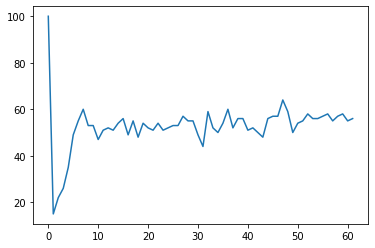

62


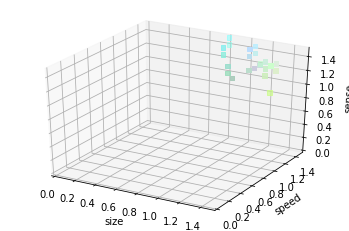

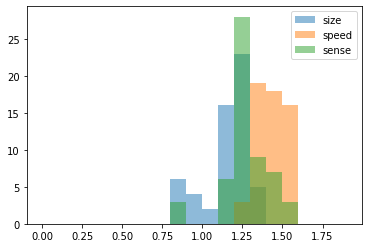

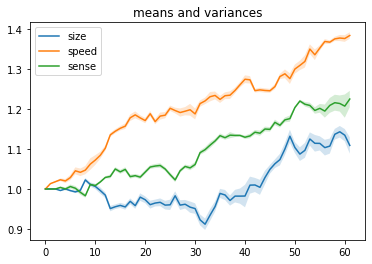

In [30]:
%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3D plotting

fig = plt.figure()
plt.plot(np.arange(0,len(stats["population"])), stats["population"])
plt.show()

print(len(stats["attributes"]))
atts = np.array(stats["attributes"][len(stats["attributes"])-1])

si = atts[:,0] 
sp = atts[:,1]
se = atts[:,2]
max_attr = np.max([np.max(attrs) for attrs in stats["attributes"]])
colors = np.array(atts/max_attr)

fig2 = plt.figure()
ax = fig2.gca(projection='3d')
ax.scatter(xs=si,ys=sp,zs=se, c = colors, marker = "s")
plt.xlim(0, max_attr)
plt.ylim(0, max_attr)
ax.set_zlim(0, max_attr)
ax.set_xlabel("size")
ax.set_ylabel("speed")
ax.set_zlabel("sense")
plt.show()

bin_size = 0.1
bins = np.arange(0,np.ceil(max_attr), bin_size)
hist_si, edges = np.histogram(si, bins=bins)
hist_sp, edges = np.histogram(sp, bins=bins)
hist_se, edges = np.histogram(se, bins=bins)
fig = plt.figure()
plt.bar(bins[:-1], hist_si, width=bin_size, align='edge', alpha=.5)
plt.bar(bins[:-1], hist_sp, width=bin_size, align='edge', alpha=.5)
plt.bar(bins[:-1], hist_se, width=bin_size, align='edge', alpha=.5)
plt.legend(["size", "speed", "sense"])
plt.show()

#print([atts.shape for atts in stats["attributes"]])
means = np.array([[np.mean(np.array(atts)[:,0]), np.mean(np.array(atts)[:,1]), np.mean(np.array(atts)[:,2])] if len(atts) > 1 else atts[0,:] for atts in stats["attributes"]])
variances =  np.array([[np.var(np.array(atts)[:,0]),  np.var(np.array(atts)[:,1]),  np.var(np.array(atts)[:,2])] if len(atts) > 1 else [0, 0, 0] for atts in stats["attributes"]])

fig = plt.figure()
plt.plot(np.arange(0,len(means)), means[:,0])
plt.fill_between(np.arange(0,len(means)),means[:,0]-variances[:,0],means[:,0]+variances[:,0],alpha=.2)

plt.plot(np.arange(0,len(means)), means[:,1])
plt.fill_between(np.arange(0,len(means)),means[:,1]-variances[:,1],means[:,1]+variances[:,1],alpha=.2)

plt.plot(np.arange(0,len(means)), means[:,2])
plt.fill_between(np.arange(0,len(means)),means[:,2]-variances[:,2],means[:,2]+variances[:,2],alpha=.2)

plt.legend(["size", "speed", "sense"])
plt.title("means and variances")
plt.show()